In [90]:
import os
import copy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
os.environ["PYTHONIOENCODING"] = "utf-8"

In [92]:
MODELED_PATH = "F:\\Sistema\\Downloads\\bigDataProjefct\\modeled\\"
SELF_PATH = 'F:\\Sistema\\Downloads\\bigDataProjefct\\self\\'

In [93]:
dataframe = pd.read_parquet(f'{MODELED_PATH}final_dataset.parquet', engine='fastparquet')

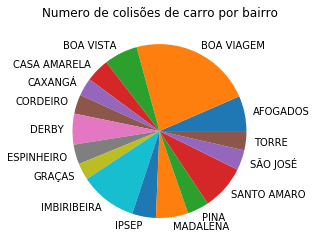

In [94]:
"""
Numero de colisões de carro por bairro
"""
df = copy.deepcopy(dataframe)

df = df[df['natureza'].isin(['COLISÃO'])]
df = df[df['auto'] > 0.0]

df['data'] = pd.to_datetime(df['data'])

df = df.sort_values('bairro')

df = df.groupby(df['bairro'])['natureza'].count().reset_index(name="count")

df = df[df['count'] > 400]

plt.pie(df['count'],  labels=df['bairro'])
plt.title('Numero de colisões de carro por bairro')
plt.savefig(f'{SELF_PATH}Carro_Bairro_Quantidade_Acidentes.png')
plt.show()

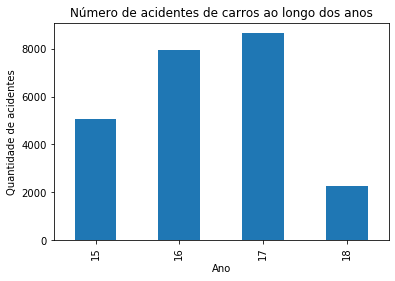

In [95]:
"""
Número de acidentes de carros ao longo dos anos
"""
df = copy.deepcopy(dataframe)

df = df[df['auto'] > 0.0]

df['data'] = pd.to_datetime(df['data'])

df = df.sort_values('data')

df = df.groupby(by=[df['data'].dt.strftime('%y')])['natureza'].count()

df.plot(kind='bar')

plt.title('Número de acidentes de carros ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de acidentes')
plt.savefig(f'{SELF_PATH}Carro_Ano_Quantidade_Acidentes.png')
plt.show()

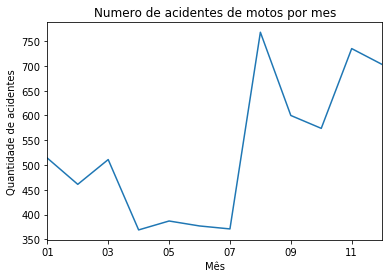

In [96]:
"""
Numero de acidentes de motos por mes
"""
df = copy.deepcopy(dataframe)

df = df[df['moto'] > 0.0]

df['data'] = pd.to_datetime(df['data'])

df = df.sort_values('data')

df = df.groupby(by=[df['data'].dt.strftime('%m')])['natureza'].count()

df.plot()

plt.title('Numero de acidentes de motos por mes')
plt.xlabel('Mês')
plt.ylabel('Quantidade de acidentes')
plt.savefig(f'{SELF_PATH}Moto_Mes_Quantidade_Acidentes.png')
plt.show()

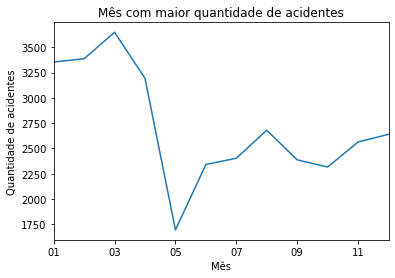

In [97]:
"""
Mes com maior quantidade de acidentes
"""
df = copy.deepcopy(dataframe)

df['data'] = pd.to_datetime(df['data'])

df = df.sort_values('data')

df = df.groupby(by=[df['data'].dt.strftime('%m')])['natureza'].count()

df.plot()

plt.title('Mês com maior quantidade de acidentes')
plt.xlabel('Mês')
plt.ylabel('Quantidade de acidentes')
plt.savefig(f'{SELF_PATH}Mes_Quantidade_Acidentes.png')
plt.show()

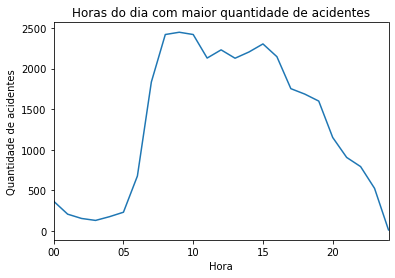

In [98]:
"""
Horas do dia com maior quantidade de acidentes
"""
df = copy.deepcopy(dataframe)

df['hora'] = pd.to_datetime(df['hora'])

df = df.sort_values('hora')

df = df.groupby(by=[df['hora'].dt.strftime('%H')])['natureza'].count()

df.plot()

plt.title('Horas do dia com maior quantidade de acidentes')
plt.xlabel('Hora')
plt.ylabel('Quantidade de acidentes')
plt.savefig(f'{SELF_PATH}Hora_Quantidade_Acidentes.png', transparent=True, dpi=100)
plt.show()